# Exploring & Time Series Forecast of Energy Consumption Dataset

## Objective
To create an energy consumption forecasting model. Given a future date the model would tell us how much energy would be consumed.

## Data Set Information:
The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a 
ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. 
Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy 
meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded 
from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets 
using the date and time column. Two random variables have been included in the data set for testing the regression models 
and to filter out non predictive attributes (parameters). 

### Attribute Information:


| Field | Description |  | Field | Description | 
| --- | --- | --- | --- | -- |
| date | time year-month-day hour:minute:second |                   | T7 | Temperature in ironing room, in Celsius |
| Appliances | time energy use in Wh || RH_7 | Humidity in ironing room, in %  |
| lights | energy use of light fixtures in the house in Wh  || T8 | Temperature in teenager room 2, in Celsius |
| T1 | Temperature in kitchen area, in Celsius || RH_8 | Humidity in teenager room 2, in %  |
| RH_1 | Humidity in kitchen area, in % || T9 | Temperature in parents room, in Celsius  |
| T2 | Temperature in living room area, in Celsius || RH_9 | Humidity in parents room, in %  |
| RH_2 | Humidity in living room area, in %  || To | Temperature outside (from Chievres weather station), in Celsius  |
| T3 | Temperature in laundry room area  || Pressure | (from Chievres weather station), in mm Hg  |
| RH_3 | Humidity in laundry room area, in %  || RH_out | Humidity outside (from Chievres weather station), in %  |
| T4 | Temperature in office room, in Celsius || Wind speed | (from Chievres weather station), in m/s   |
| RH_4 | Humidity in office room, in %  || Visibility | (from Chievres weather station), in km |
| T5 | Temperature in bathroom, in Celsius || Tdewpoint | (from Chievres weather station), Â°C  |
| RH_5 | Humidity in bathroom, in %  || rv1 | Random variable 1, nondimensional  |
| T6 | Temperature outside the building (north side), in Celsius  || rv2 | Random variable 2, nondimensional  |
| RH_6 | Humidity outside the building (north side), in %  |


## 1. import libraries and dataset

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import datetime

In [30]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [16]:
os.chdir("/Users/swang/data science resources/challenge/energy")

In [17]:
df_energy = pd.read_csv('dataset.csv', parse_dates=["date"])

In [18]:
#df_energy = df_energy.set_index('date')
df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [19]:
df_energy['combined'] = df_energy['Appliances'] + df_energy['lights']

In [20]:
df_energy = df_energy[['date','Appliances', 'lights','combined', 'T_out', 'Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint',
'T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9',]]

In [21]:
df_energy.describe(include="all")

,date,Appliances,lights,combined,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,...,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-03-30 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-05-27 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,101.496833,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,...,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401
std,NaN,102.524891,7.935988,104.380829,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,...,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497
min,NaN,10.000000,0.000000,10.000000,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,...,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667
25%,NaN,50.000000,0.000000,50.000000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,...,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000


In [22]:
#check for missing values
print(df_energy.isnull().sum())

date           0
Appliances     0
lights         0
combined       0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
dtype: int64


## 2. Distribution of Energy Consumption Variables

/Users/swang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


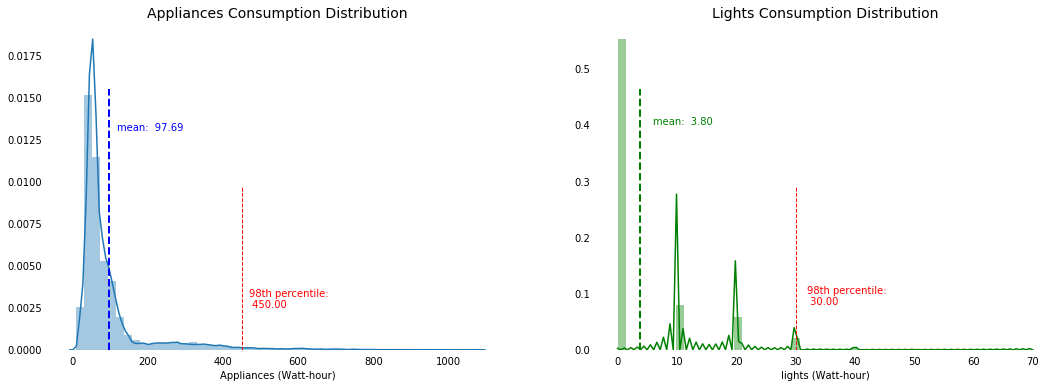

In [31]:
plt.figure(figsize=(18, 6))
    
ax = plt.subplot(1,2, 1)    
sns.distplot(df_energy['Appliances'])
plt.axvline(df_energy['Appliances'].mean(),linewidth  = 2 ,
                linestyle = "dashed",color = "b" ,
                label = "Mean", ymax=0.8)
plt.axvline(np.percentile(df_energy['Appliances'], 98),linewidth  = 1 ,
                linestyle = "dashed",color = "r" ,
                label = "percentile", ymax=0.5)
#plt.legend(loc = "best")
plt.title('Appliances Consumption Distribution', fontsize=14)
ax.tick_params(top=False, bottom=False, left=False, right=False)
plt.xlabel("Appliances (Watt-hour)")
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.grid(False)
ax.text(120,0.013, "mean:  " + "{:.2f}".format(df_energy['Appliances'].mean()), color="b") #rotation="vertical", 
ax.text(470,0.0025, "98th percentile:  \n " + "{:.2f}".format(np.percentile(df_energy['Appliances'], 98)), color="r") #rotation="vertical",     
ax2 = plt.subplot(1,2, 2) 
sns.distplot(df_energy['lights'],color = "g")
plt.axvline(df_energy['lights'].mean(),linewidth  = 2 ,
                linestyle = "dashed",color = "g" ,
                label = "Mean", ymax=0.8)
plt.axvline(np.percentile(df_energy['lights'], 98),linewidth  = 1 ,
                linestyle = "dashed",color = "r" ,
                label = "percentile", ymax=0.5)
plt.title('Lights Consumption Distribution',fontsize=14)
ax2.tick_params(top=False, bottom=False, left=False, right=False)
plt.xlabel("lights (Watt-hour)")
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)    
ax2.grid(False)
ax2.text(6,0.4, "mean:  " + "{:.2f}".format(df_energy['lights'].mean()), color="g")
ax2.text(32,0.08, "98th percentile:  \n " + "{:.2f}".format(np.percentile(df_energy['lights'], 98)), color="r") #rotation="vertical", 
plt.show()

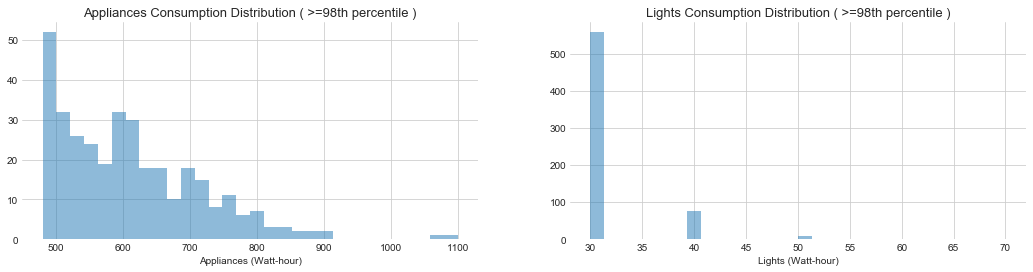

In [33]:
# now check the extreme values for Appliances and lights consumption

fig = plt.figure(figsize=(18,4))
ax1 = fig.add_subplot(1,2,1)
plt.style.use('seaborn-whitegrid')
#sns.despine()
ax1.hist(df_energy['Appliances'], range=[480, 1100], alpha=0.5, bins=30)
ax1.set_title('Appliances Consumption Distribution ( >=98th percentile )',fontsize=13)
plt.xlabel("Appliances (Watt-hour)")

ax2 = fig.add_subplot(1,2,2)
ax2.hist(df_energy['lights'], range=[30, 70], alpha=0.5, bins=30)
ax2.set_title('Lights Consumption Distribution ( >=98th percentile )',fontsize=13)
plt.xlabel("Lights (Watt-hour)")

ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

plt.show()


The graphs above shows what can be considered as extreme values / outliers. Let's see how many there are, and we can decide if we want to remove them from the dataset

In [34]:
df_energy[df_energy["Appliances"] > 800]["Appliances"].value_counts()
df_appl_outliers = df_energy[df_energy["Appliances"] > 800]

df_energy[df_energy["lights"] > 40]["lights"].value_counts()
df_lights_outliers = df_energy[df_energy["lights"] > 40]
df_appl_outliers
df_lights_outliers

## 3. Distribution of Other Variables

** Firstly look at variables that represents measurements taken from a nearby weather station, or immediately outside the house**

/Users/swang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


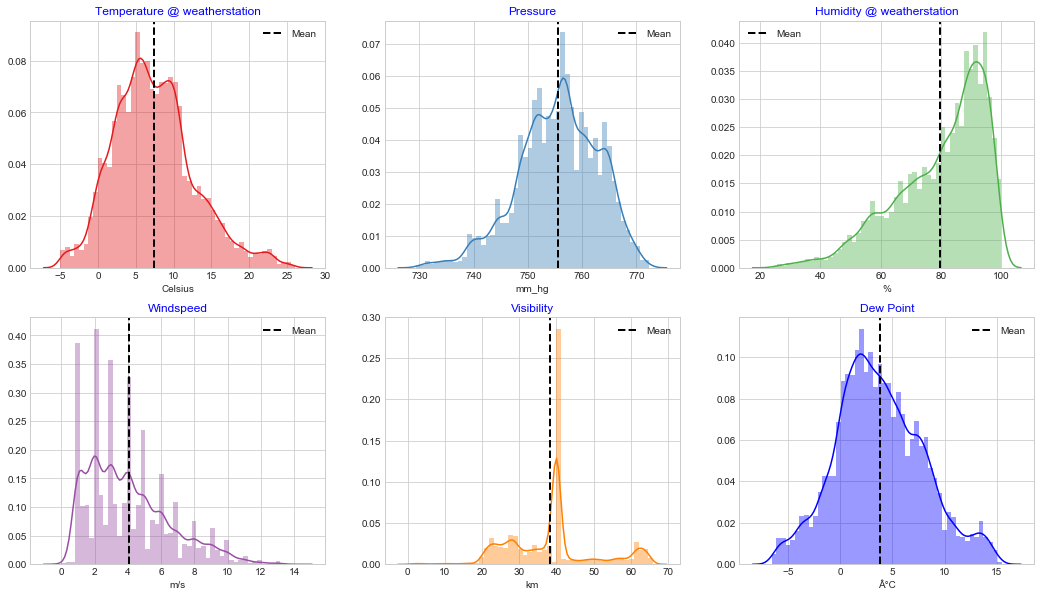

In [37]:
cols = ['T_out', 'Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']
units = ['Celsius', 'mm_hg','%','m/s','km','Â°C']
labels = ['Temperature @ weatherstation', 'Pressure','Humidity @ weatherstation','Windspeed','Visibility','Dew Point']

length = len(cols)
cs     = [(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
          (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
          (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
          (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
          (1.0, 0.4980392156862745, 0.0),"b"]

sns.set_style("whitegrid")
plt.figure(figsize = (18,10))
for i,j,k in itertools.zip_longest(cols,range(length),cs) :
    plt.subplot(length/3,length/2,j+1)
#    if j==0:
#        sns.distplot(df_energy["T6"],color = "b")
    sns.distplot(df_energy[i],color = k)
    plt.axvline(df_energy[i].mean(),linewidth  = 2 ,
                linestyle = "dashed",color = "k" ,
                label = "Mean")
    plt.legend(loc = "best")    
    plt.title(labels[j],color = "b")
    plt.xlabel(units[j])
plt.show()

** now look at the measurements taken from inside the house ** 

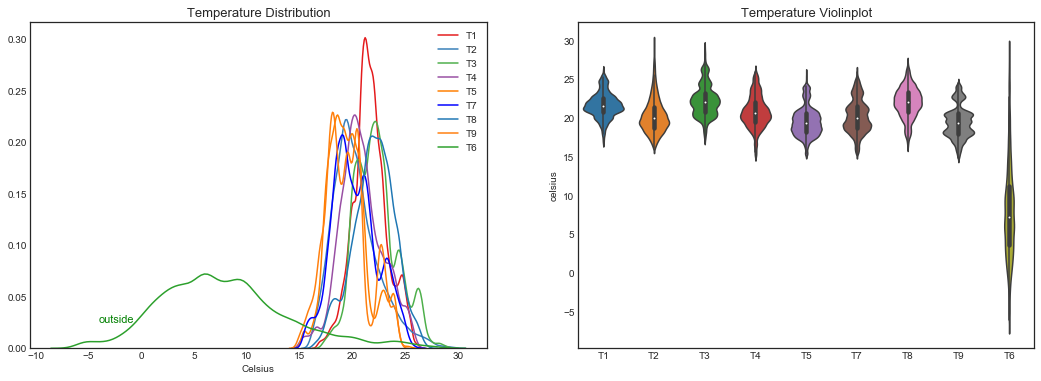

In [38]:
cols = ['T1', 'T2', 'T3', 'T4', 'T5', 'T7', 'T8', 'T9', 'T6']

cs     = [(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
          (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
          (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
          (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
          (1.0, 0.4980392156862745, 0.0),"b"]

sns.set_style("white")

plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
for i,j,k in itertools.zip_longest(cols,range(length),cs) :
    sns.kdeplot(df_energy[i],color = k, label=i)
plt.text(-4,0.025, "outside", color="g",fontsize=11)
plt.title("Temperature Distribution", fontsize=13)
plt.xlabel("Celsius")

plt.subplot(1,2,2)
df=df_energy[cols]
sns.violinplot(x="variable", y="value", data=pd.melt(df))
plt.title("Temperature Violinplot", fontsize=13)
plt.xlabel("")
plt.ylabel("celsius")

plt.show()



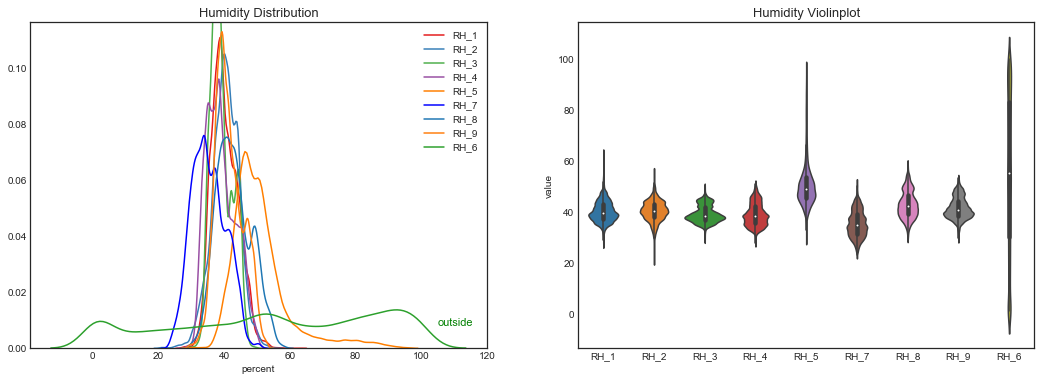

In [39]:
cols2 = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_7', 'RH_8', 'RH_9', 'RH_6']

plt.figure(figsize = (18,6))

sns.set_style("white")

plt.subplot(1,2,1)
for i,j,k in itertools.zip_longest(cols2,range(length),cs) :
    sns.kdeplot(df_energy[i],color = k, label=i)
plt.text(105,0.008, "outside", color="g",fontsize=11)
plt.title("Humidity Distribution", fontsize=13)
plt.xlabel("percent")

plt.subplot(1,2,2)
df=df_energy[cols2]
sns.violinplot(x="variable", y="value", data=pd.melt(df))
plt.title("Humidity Violinplot", fontsize=13)
plt.xlabel("")
plt.show()



**Observation:** it appears that the outside temperature and humidity spans a much larger range of values compared to inside the house. This suggest appliances such as heating may have been used inside the house to keep the temperature and humidity within an agreeable range

With this in mind, let's add two other fields to the dataset, to represent the difference between interior and exterior temperature and humidity.

## 4. Adding additional variables

We would like to add the following additional variables to assist with the analysis:
   1. ***holiday\_flag*** - set to True for holidays in Belgium in 2016
   2. ***weekend\_flag*** - set to True for Sat & Sun
   3. ***int\_temp*** - average of interior temperature 
   4. ***int\_humd*** - average of interior humidity
   5. ***temp\_diff*** - difference between temperature outside the house (T6) and the interior temperature
   6. ***humd\_diff*** - difference between humidity outside the house and the interior humidity

In [40]:
# Setting "holiday_flag"

#df_energy.reset_index(inplace=True)

holidays = ["2016-01-01", "2016-03-20", "2016-03-25", "2016-03-27", "2016-03-28", "2016-05-01", "2016-05-05", "2016-05-15", "2016-05-16"]
df_energy["holiday_flag"] = False
for hol in holidays:
    holiday = datetime.datetime.strptime(hol, '%Y-%m-%d')
    holiday_n = holiday + datetime.timedelta(days=1)
    df_energy.loc[(df_energy["date"] >= holiday) & (df_energy["date"] < holiday_n), "holiday_flag"] = True
    #bool_date = (df_energy.index >= holiday & df_energy.index < holiday + datetime.timedelta(days=1)
    #df_energy[bool_date]

In [41]:
df_energy["holiday_flag"].value_counts().head()

False    18583
True      1152
Name: holiday_flag, dtype: int64

In [42]:
df_energy.set_index("date", inplace=True)

In [43]:
# Setting "weekend_flag"
df_energy["weekend_flag"] = df_energy.index.weekday.isin([5,6])

In [44]:
df_energy.index.dtype

dtype('<M8[ns]')

In [45]:
# Setting int_temp, int_humd, temp_diff, humd_diff
df_energy["int_temp"] = df_energy[cols[:-1]].mean(axis=1)

In [46]:
df_energy["int_humd"] = df_energy[cols2[:-1]].mean(axis=1)

In [47]:
df_energy["temp_diff"] = df_energy["int_temp"] - df_energy["T6"]
df_energy["humd_diff"] = df_energy["int_humd"] - df_energy["RH_6"]

In [48]:
df_energy.head()

,Appliances,lights,combined,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,T1,...,T8,RH_8,T9,RH_9,holiday_flag,weekend_flag,int_temp,int_humd,temp_diff,humd_diff
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,90,6.600000,733.5,92.0,7.000000,63.000000,5.3,19.89,...,18.2,48.900000,17.033333,45.53,False,False,18.435000,46.742500,11.408333,-37.514167
2016-01-11 17:10:00,60,30,90,6.483333,733.6,92.0,6.666667,59.166667,5.2,19.89,...,18.2,48.863333,17.066667,45.56,False,False,18.439167,46.672708,11.605833,-37.390625
2016-01-11 17:20:00,50,30,80,6.366667,733.7,92.0,6.333333,55.333333,5.1,19.89,...,18.2,48.730000,17.000000,45.50,False,False,18.421667,46.562917,11.861667,-36.593750
2016-01-11 17:30:00,50,40,90,6.250000,733.8,92.0,6.000000,51.500000,5.0,19.89,...,18.1,48.590000,17.000000,45.40,False,False,18.396250,46.468750,11.962917,-36.954583
2016-01-11 17:40:00,60,40,100,6.133333,733.9,92.0,5.666667,47.666667,4.9,19.89,...,18.1,48.590000,17.000000,45.40,False,False,18.408750,46.462917,12.042083,-38.430417


In [50]:
df_energy = df_energy[['Appliances', 'lights', 'combined', 'weekend_flag', 'holiday_flag', 'int_temp', 'int_humd', 'T6', 'RH_6','temp_diff', 'humd_diff',
'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 
 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',  'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 
 ]]

In [51]:
df_energy.rename(index=str, columns={"T6": "out_temp", "RH_6": "out_humd"}, inplace=True)

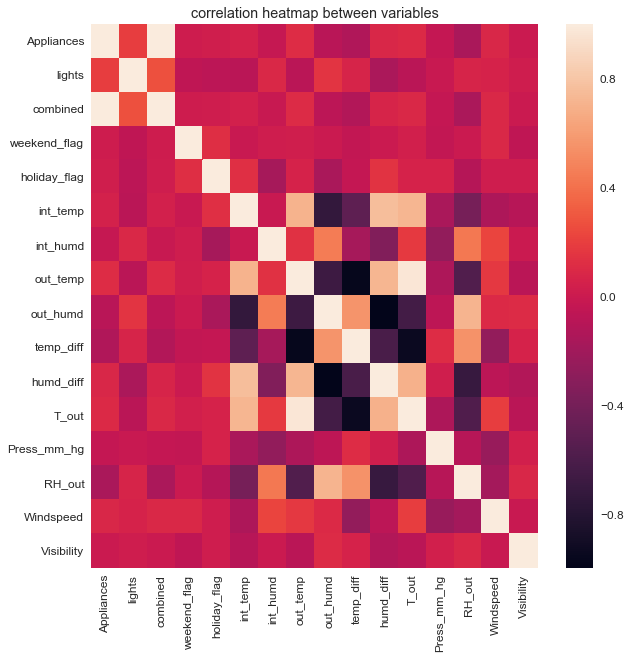

In [52]:
plt.figure(figsize = (10,10))

corr = df_energy.iloc[:,:16].corr()
sns.set(font_scale=1.2)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title("correlation heatmap between variables")
plt.show()

The heatmap above shows there is no strong correlation between any of the input variables with the target variables - "Appliances", "lights", "combined"

## 5. Check Time Series Patterns

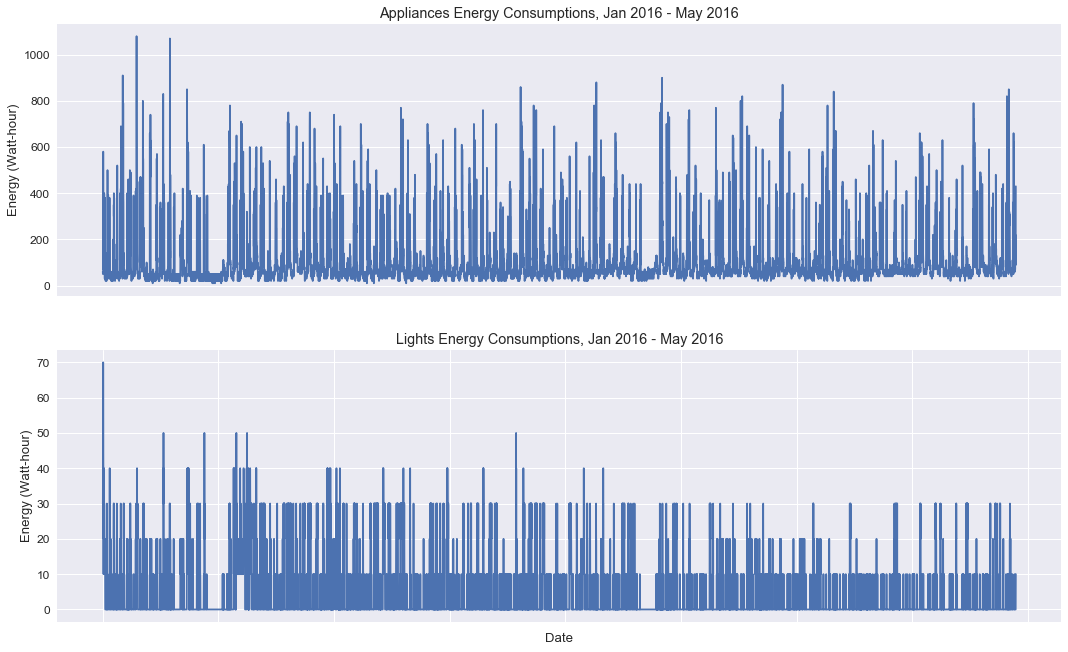

In [53]:
plt.figure(figsize=(18, 11))
sns.set_style("darkgrid")

#fig, axs = plt.subplots(2, 1, sharex=True)

plt.subplot(2,1,1)
df_energy['Appliances'].plot()
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.title('Appliances Energy Consumptions, Jan 2016 - May 2016')
#plt.xlabel('Date')
#plt.axis('off')
plt.ylabel('Energy (Watt-hour)')

plt.subplot(2,1,2)
df_energy['lights'].plot()
plt.title('Lights Energy Consumptions, Jan 2016 - May 2016')
plt.xlabel('Date')
plt.ylabel('Energy (Watt-hour)')
plt.show()


The plot looks a little messy as it was sampled every 10 minutes. Let's resample on a daily basis and re-examine the plot

** Creating a dataframe to represent Daily Energy Consumption **

In [54]:
df_energy.reset_index(inplace=True)

In [55]:
df_energy["date"] = pd.to_datetime(df_energy["date"])

In [57]:
df_energy.set_index("date",inplace=True)

In [59]:
df_energy_daily = df_energy.resample('D').mean()

In [60]:
df_energy_daily["Appliances"] = df_energy_daily["Appliances"] * 24  # as the measurements are watts per hour - this will now represent the daily consumption
df_energy_daily["lights"] = df_energy_daily["lights"] * 24  # as the measurements are watts per hour - this will now represent the daily consumption
df_energy_daily["combined"] = df_energy_daily["combined"] * 24  # as the measurements are watts per hour - this will now represent the daily consumption
df_energy_daily.describe()

,Appliances,lights,combined,int_temp,int_humd,out_temp,out_humd,temp_diff,humd_diff,T_out,...,T4,RH_4,T5,RH_5,T7,RH_7,T8,RH_8,T9,RH_9
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,...,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,2351.112995,94.338740,2445.451735,20.812248,41.263508,7.921020,54.706532,12.891228,-13.443025,7.421253,...,20.854813,39.077411,19.589144,50.996497,20.260152,35.442465,22.015805,42.980415,19.478673,41.578885
std,731.298895,92.650828,762.837161,1.775129,3.645425,5.129613,27.988988,3.854145,26.563048,4.634690,...,1.958590,4.186637,1.780676,4.750393,2.072313,4.685931,1.859937,4.474284,2.020102,3.668733
min,900.000000,0.000000,900.000000,16.338792,35.319880,-4.249048,8.012171,3.593498,-55.703154,-2.937847,...,15.356111,31.976834,15.480710,40.332078,15.625498,26.007679,17.362951,35.503432,15.097216,33.983455
25%,1813.750000,28.750000,1928.750000,19.650519,38.315984,4.227455,32.518304,10.636614,-39.790963,4.078646,...,19.607582,35.519557,18.313160,47.283618,18.765923,31.592763,20.913630,39.757817,18.039213,38.638456
50%,2225.000000,75.000000,2324.166667,20.526286,40.547303,7.620509,48.793194,12.946218,-10.008931,7.039236,...,20.548145,38.486189,19.364421,50.537184,20.078004,34.965332,22.269444,41.775613,19.436227,40.752954
75%,2719.166667,129.583333,2750.416667,21.694637,44.060581,10.793164,83.817400,15.806133,10.350412,9.859809,...,21.889250,42.448147,20.588678,54.199956,21.470662,38.980558,23.246459,46.733624,20.614062,44.253089
max,4525.000000,720.000000,4615.000000,25.347047,49.927046,20.788414,99.900000,22.553314,32.003485,19.372569,...,25.489118,49.107610,24.251053,61.323788,25.102454,47.243391,26.043056,53.868854,24.169420,50.883542


** Observation - ** it is difficult to tell if there is any trend in the Appliances energy consumption, as the pattern is fairly irregular and has a high variance. On the other hand, the light usage appear to show a decreasing trend. This may be somewhat correlated with the temperature?

** Let's examing the distribution patterns for appliances**

/Users/swang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/swang/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


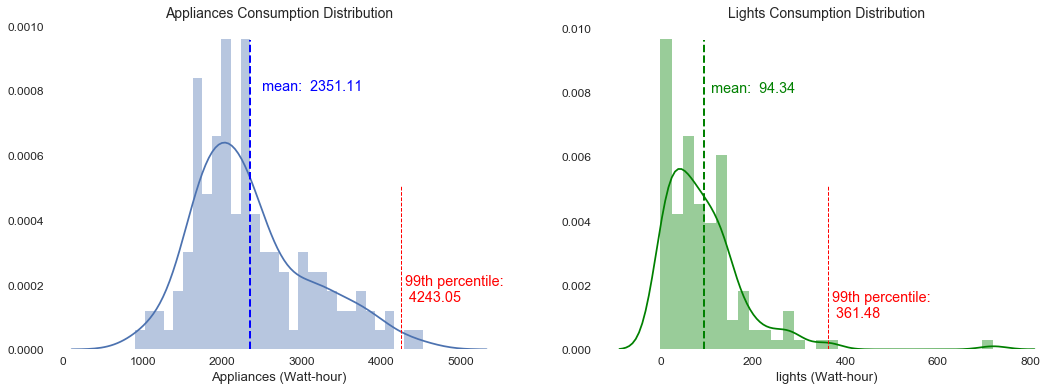

In [61]:
plt.figure(figsize=(18, 6))

sns.set_style("white")
ax = plt.subplot(1,2, 1)    
sns.distplot(df_energy_daily['Appliances'], bins=30)
plt.axvline(df_energy_daily['Appliances'].mean(),linewidth  = 2 ,
                linestyle = "dashed",color = "b" ,
                label = "Mean", ymax=0.95)
plt.axvline(np.percentile(df_energy_daily['Appliances'], 99),linewidth  = 1 ,
                linestyle = "dashed",color = "r" ,
                label = "percentile", ymax=0.5)
#plt.legend(loc = "best")
plt.title('Appliances Consumption Distribution', fontsize=14)
ax.tick_params(top="off", bottom="off", left="off", right="off")
plt.xlabel("Appliances (Watt-hour)")
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.grid(False)
ax.text(2500,0.0008, "mean:  " + "{:.2f}".format(df_energy_daily['Appliances'].mean()), color="b") #rotation="vertical", 
ax.text(4300,0.00015, "99th percentile:  \n " + "{:.2f}".format(np.percentile(df_energy_daily['Appliances'], 99)), color="r") #rotation="vertical",     

ax2 = plt.subplot(1,2, 2) 
sns.distplot(df_energy_daily['lights'],color = "g", bins=30)
plt.axvline(df_energy_daily['lights'].mean(),linewidth  = 2 ,
                linestyle = "dashed",color = "g" ,
                label = "Mean", ymax=0.95)
plt.axvline(np.percentile(df_energy_daily['lights'], 99),linewidth  = 1 ,
                linestyle = "dashed",color = "r" ,
                label = "percentile", ymax=0.5)
plt.title('Lights Consumption Distribution',fontsize=14)
ax2.tick_params(top="off", bottom="off", left="off", right="off")
plt.xlabel("lights (Watt-hour)")
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.spines["bottom"].set_visible(False)    
ax2.grid(False)
ax2.text(110,0.008, "mean:  " + "{:.2f}".format(df_energy_daily['lights'].mean()), color="g")
ax2.text(370,0.001, "99th percentile:  \n " + "{:.2f}".format(np.percentile(df_energy_daily['lights'], 99)), color="r") #rotation="vertical", 
plt.show()

** now look into the outliers **

In [62]:
df_appl_outliers_daily = df_energy_daily[df_energy_daily["Appliances"] > 4300]
df_lights_outliers_daily = df_energy_daily[df_energy_daily["lights"] > 400]

In [63]:
df_appl_outliers_daily.sort_values(by=["Appliances"], ascending = False).head(5)

,Appliances,lights,combined,weekend_flag,holiday_flag,int_temp,int_humd,out_temp,out_humd,temp_diff,...,T4,RH_4,T5,RH_5,T7,RH_7,T8,RH_8,T9,RH_9
date,,,,,,,,,,,,,,,,,,,,,
2016-04-04,4525.0,90.000000,4615.000000,False,False,21.962468,45.267702,13.209913,37.670648,8.752554,...,21.422373,43.930469,20.588906,54.795648,21.333090,38.754821,24.007472,46.848626,20.597083,45.522263
2016-03-25,4330.0,46.666667,4376.666667,False,True,20.842208,41.529781,7.311946,63.258366,13.530262,...,20.097292,39.109676,19.524797,49.124680,20.599669,36.887163,22.331837,42.919514,19.548478,41.546921


In [64]:
df_lights_outliers_daily.sort_values(by=["lights"], ascending = False).head(5)

,Appliances,lights,combined,weekend_flag,holiday_flag,int_temp,int_humd,out_temp,out_humd,temp_diff,...,T4,RH_4,T5,RH_5,T7,RH_7,T8,RH_8,T9,RH_9
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,3280.0,720.0,4000.0,False,False,18.977145,47.682691,5.891607,86.336349,13.085538,...,19.492222,47.260813,17.977798,59.011786,17.604028,43.026925,18.722063,49.363968,16.918175,45.10621


The outlier for "lights" belongs to the first day in the time series range. There may be a reason for this, eg. equipment testing / configuration. It appears to skew the data quite considerably, so we will remove rows with the date 2016-01-11 from the dataframe and start sampling the next day 

In [65]:
start_remove = pd.to_datetime('2016-1-10')
end_remove = pd.to_datetime('2016-1-11')

df_energy_daily1 = df_energy_daily.loc[(df_energy_daily.index < start_remove) | (df_energy_daily.index > end_remove)]

In [68]:
df_energy_daily = df_energy_daily1

** Plot the time series again, with the daily sampled data **

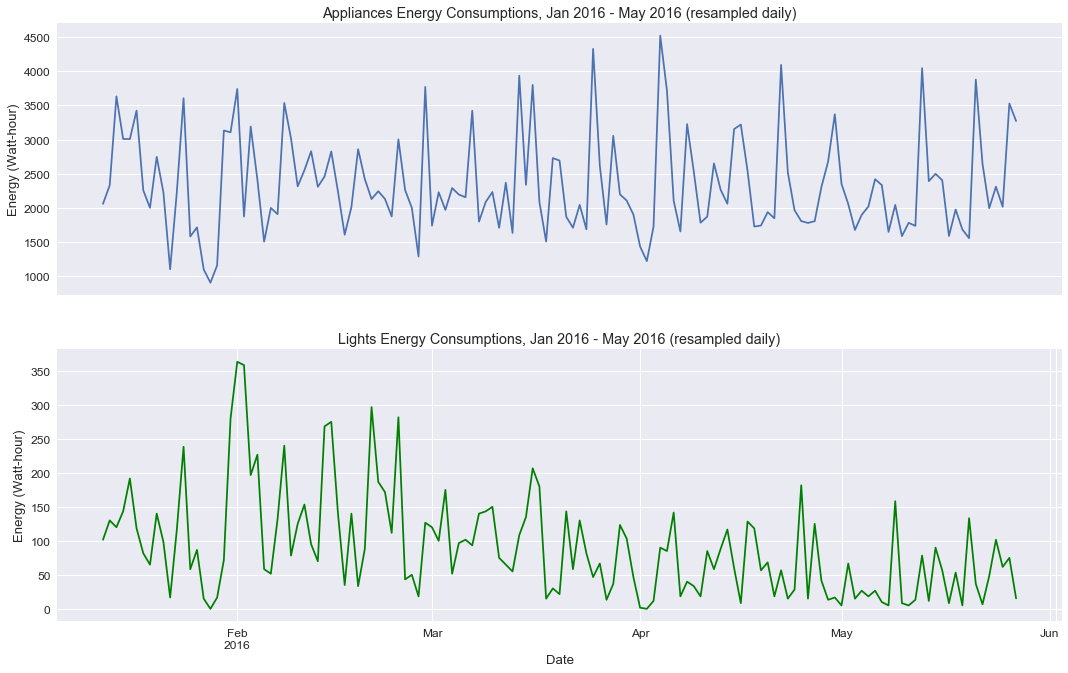

In [69]:
plt.figure(figsize=(18, 11))
sns.set_style("darkgrid")

#fig, axs = plt.subplots(2, 1, sharex=True)

plt.subplot(2,1,1)
df_energy_daily1['Appliances'].plot()
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.title('Appliances Energy Consumptions, Jan 2016 - May 2016 (resampled daily)')
#plt.xlabel('Date')
#plt.axis('off')
plt.ylabel('Energy (Watt-hour)')

plt.subplot(2,1,2)
df_energy_daily1['lights'].plot(color='g')
plt.title('Lights Energy Consumptions, Jan 2016 - May 2016 (resampled daily)')
plt.xlabel('Date')
plt.ylabel('Energy (Watt-hour)')
plt.show()

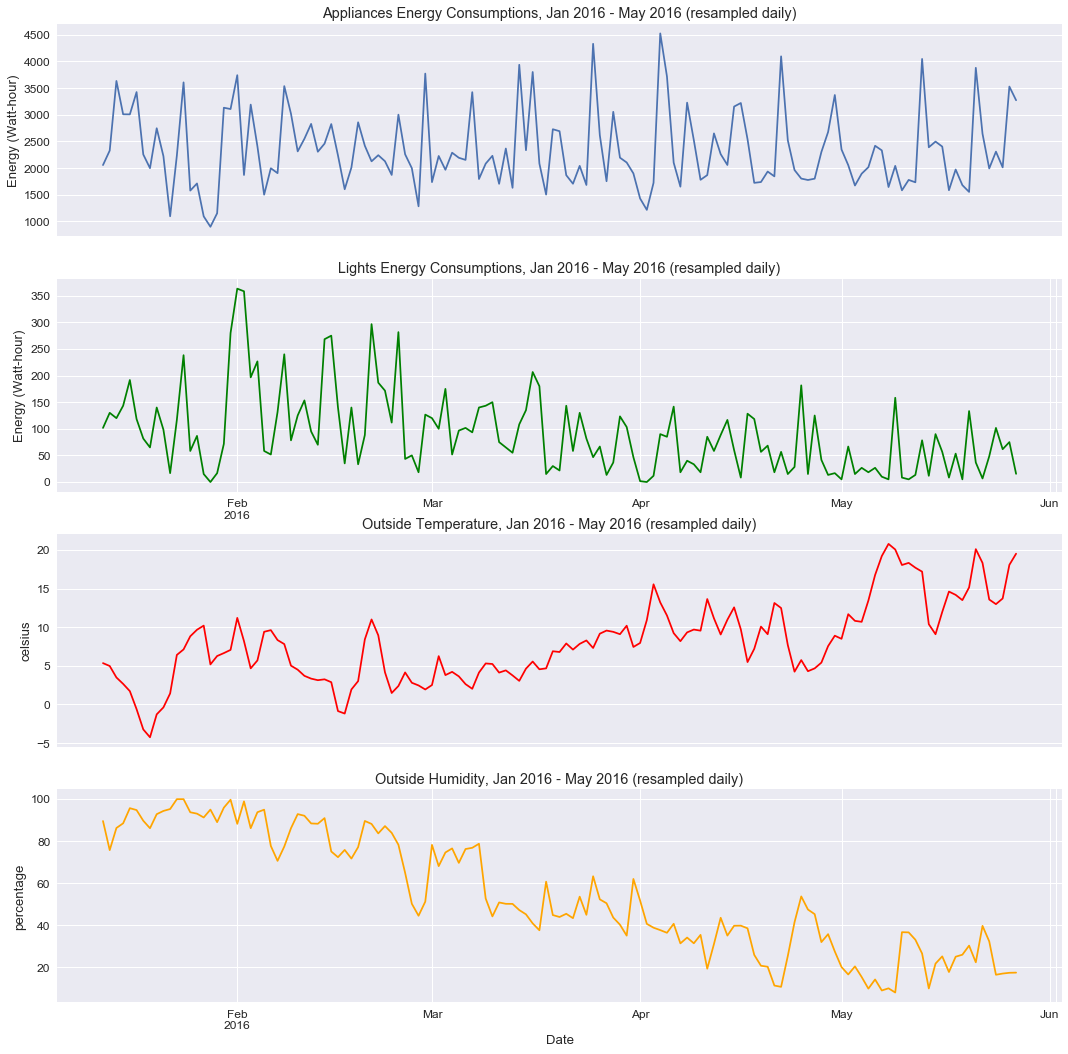

In [70]:
plt.figure(figsize=(18, 18))
sns.set_style("darkgrid")

#fig, axs = plt.subplots(2, 1, sharex=True)

plt.subplot(4,1,1)
df_energy_daily['Appliances'].plot()
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.title('Appliances Energy Consumptions, Jan 2016 - May 2016 (resampled daily)')
#plt.xlabel('Date')
#plt.axis('off')
plt.ylabel('Energy (Watt-hour)')

plt.subplot(4,1,2)
df_energy_daily['lights'].plot(color='g')
plt.title('Lights Energy Consumptions, Jan 2016 - May 2016 (resampled daily)')
#plt.xlabel('Date')
#plt.ylim(0,300)
plt.ylabel('Energy (Watt-hour)')
plt.xlabel("")

plt.subplot(4,1,3)
df_energy_daily['out_temp'].plot(color='r')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.title('Outside Temperature, Jan 2016 - May 2016 (resampled daily)')
#plt.xlabel('Date')
plt.ylabel('celsius')


plt.subplot(4,1,4)
df_energy_daily['out_humd'].plot(color='orange')
plt.title('Outside Humidity, Jan 2016 - May 2016 (resampled daily)')
plt.xlabel('Date')
plt.ylabel('percentage')

plt.show()

** let's also remove 2016-01-11 from the regular energy dataframe (df_energy)**

In [71]:
start_remove = pd.to_datetime('2016-1-10')
end_remove = pd.to_datetime('2016-1-12')

df_energy1 = df_energy.loc[(df_energy.index < start_remove) | (df_energy.index >= end_remove)]

In [72]:
df_energy = df_energy1

** now instead of resampling, we will try with rolling window of 24 hours, and see if the results are comparable with the resampled version **

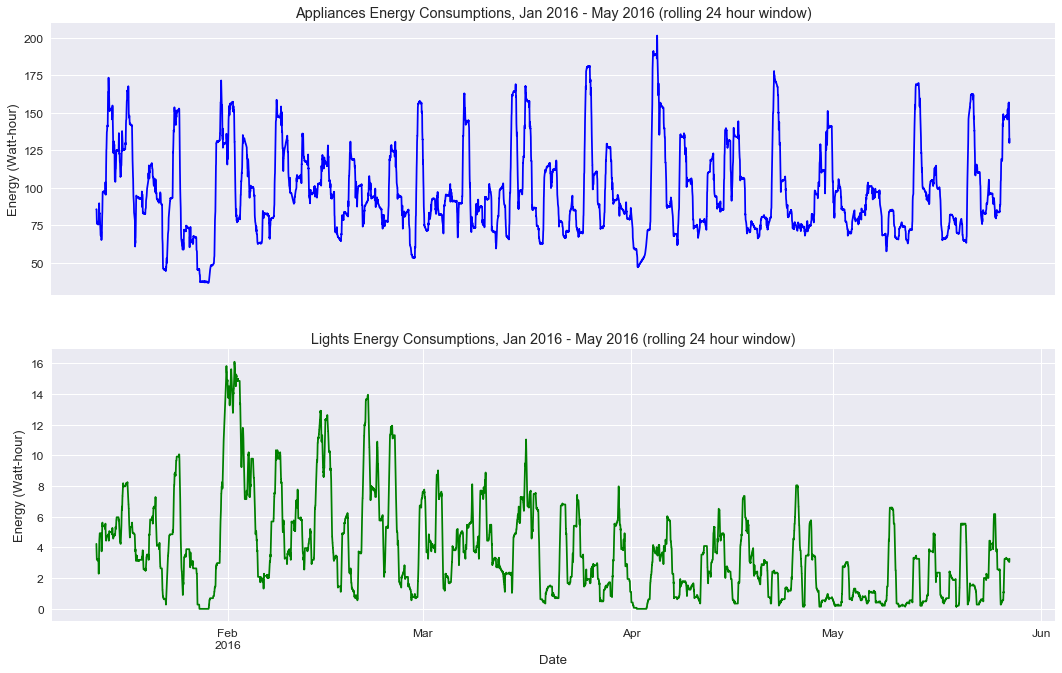

In [73]:
plt.figure(figsize=(18, 11))

plt.subplot(2,1,1)
df_energy['Appliances'].rolling(24*6, center=True).mean().plot(color='b')
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
plt.title('Appliances Energy Consumptions, Jan 2016 - May 2016 (rolling 24 hour window)')
#plt.xlabel('Date')
#plt.axis('off')
plt.ylabel('Energy (Watt-hour)')

plt.subplot(2,1,2)
df_energy['lights'].rolling(24*6, center=True).mean().plot(color='g')
plt.title('Lights Energy Consumptions, Jan 2016 - May 2016 (rolling 24 hour window)')
plt.xlabel('Date')
plt.ylabel('Energy (Watt-hour)')
plt.show()

The results are more jagged than the resampled version, as expected.

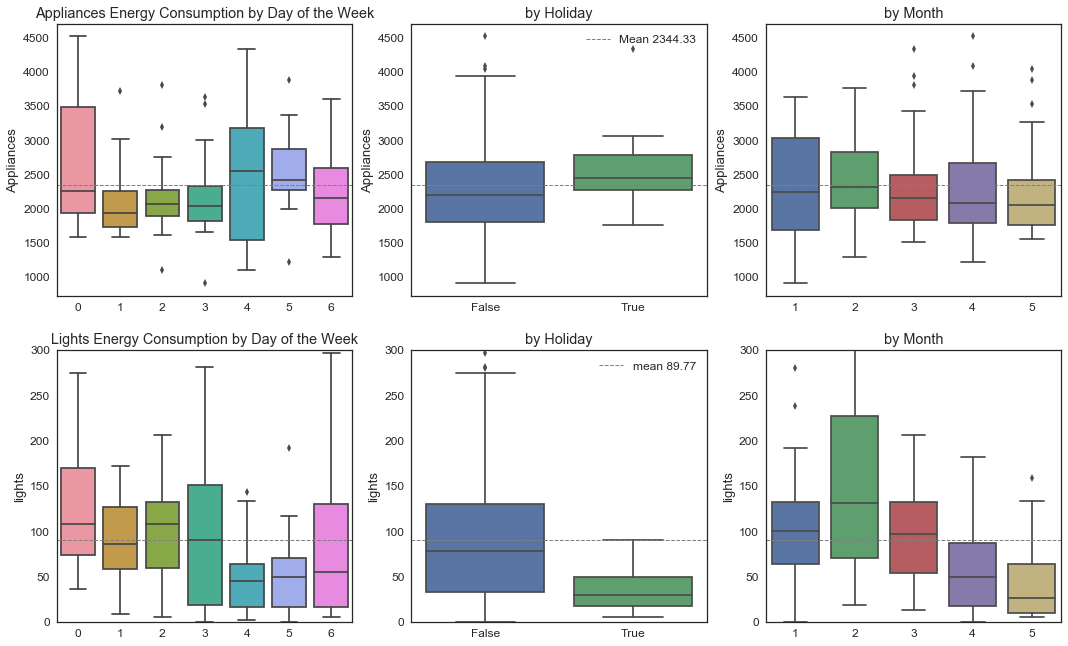

In [74]:
dayname = ["mon", "tue", "wed", "thur", "fri", "sat", "sun"]
df_energy_daily['day'] = df_energy_daily.index.dayofweek
df_energy_daily['month'] = df_energy_daily.index.month
sns.set_style("white")
fig1 = plt.figure(figsize = (18, 11))

plt.subplot(2,3,1)
ax = sns.boxplot(x="day", y="Appliances", data=df_energy_daily)
plt.axhline(df_energy_daily['Appliances'].mean(),linewidth  = 1,linestyle = "dashed",color = "grey", label = "Mean")
plt.title("Appliances Energy Consumption by Day of the Week")
plt.xlabel("")

plt.subplot(2,3,2)
ax = sns.boxplot(x="holiday_flag", y="Appliances", data=df_energy_daily)
plt.axhline(df_energy_daily['Appliances'].mean(),linewidth  = 1 ,linestyle = "dashed",color = "grey" ,label = "Mean " + "{:.2f}".format(df_energy_daily['Appliances'].mean()))
plt.title("by Holiday")
plt.legend(loc=1)
plt.xlabel("")

plt.subplot(2,3,3)
ax = sns.boxplot(x="month", y="Appliances", data=df_energy_daily)
plt.axhline(df_energy_daily['Appliances'].mean(),linewidth  = 1 ,linestyle = "dashed",color = "grey" ,label = "Mean")
plt.title("by Month")
plt.xlabel("")

plt.subplot(2,3,4)
ax = sns.boxplot(x="day", y="lights", data=df_energy_daily)
plt.axhline(df_energy_daily['lights'].mean(),linewidth  = 1 ,linestyle = "dashed",color = "grey" ,label = "Mean")
plt.ylim(0,300)
plt.title("Lights Energy Consumption by Day of the Week")
plt.xlabel("")


plt.subplot(2,3,5)
ax = sns.boxplot(x="holiday_flag", y="lights", data=df_energy_daily)
plt.axhline(df_energy_daily['lights'].mean(),linewidth  = 1 ,linestyle = "dashed",color = "grey" ,label =  "mean " + "{:.2f}".format(df_energy_daily['lights'].mean()))
plt.title("by Holiday")
plt.ylim(0,300)
plt.legend()
plt.xlabel("")

plt.subplot(2,3,6)
ax = sns.boxplot(x="month", y="lights", data=df_energy_daily)
plt.axhline(df_energy_daily['lights'].mean(),linewidth  = 1 ,
                linestyle = "dashed",color = "grey" ,
                label = "Mean")
plt.ylim(0,300)
plt.title("by Month")
plt.xlabel("")

plt.show()

It appears that the mean for the light consumption is skewed by some very high value outliers

Also, there is some trend in the monthly data, perhaps it is correlated with the temperature

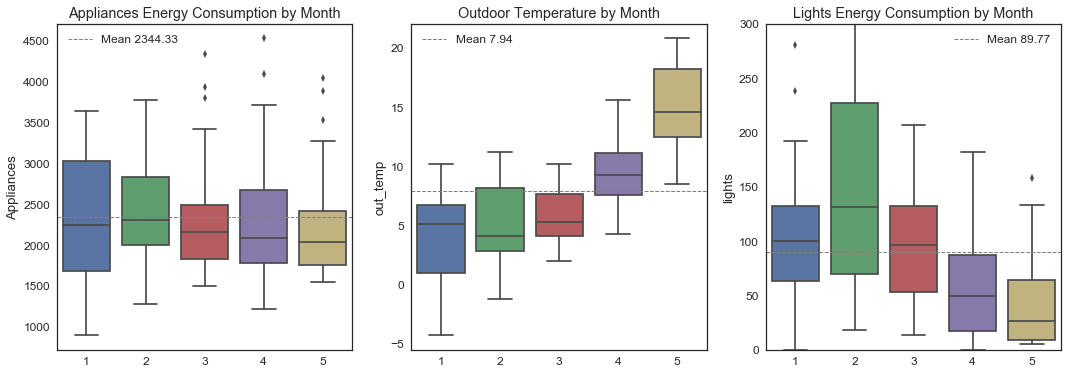

In [75]:
sns.set_style("white")
fig1 = plt.figure(figsize = (18, 6))

plt.subplot(1,3,1)
ax = sns.boxplot(x="month", y="Appliances", data=df_energy_daily)
plt.axhline(df_energy_daily['Appliances'].mean(),linewidth  = 1 , linestyle = "dashed",color = "grey" ,
                label = "Mean " + "{:.2f}".format(df_energy_daily['Appliances'].mean()))
plt.title("Appliances Energy Consumption by Month")
plt.legend(loc=2)
plt.xlabel("")

plt.subplot(1,3,2)
ax = sns.boxplot(x="month", y="out_temp", data=df_energy_daily)
plt.axhline(df_energy_daily['out_temp'].mean(),linewidth  = 1 ,linestyle = "dashed",color = "grey" ,
                label = "Mean " + "{:.2f}".format(df_energy_daily['out_temp'].mean()))
plt.title("Outdoor Temperature by Month")
plt.legend(loc=2)
plt.xlabel("")

plt.subplot(1,3,3)
ax = sns.boxplot(x="month", y="lights", data=df_energy_daily)
plt.axhline(df_energy_daily['lights'].mean(),linewidth  = 1 ,linestyle = "dashed",color = "grey" ,
                label = "Mean " + "{:.2f}".format(df_energy_daily['lights'].mean()))
plt.title("Lights Energy Consumption by Month")
plt.ylim(0,300)
plt.legend(loc=1)
plt.xlabel("")

plt.show()

It would appear that as the temperature increases, the energy consumption by appliances and lights both decrease
This suggest a potential seasonal trend. Unfortuntately there are only 4.5 month of data available, so we are not able to see it clearly played out.

## 6. Consumption patterns during the day

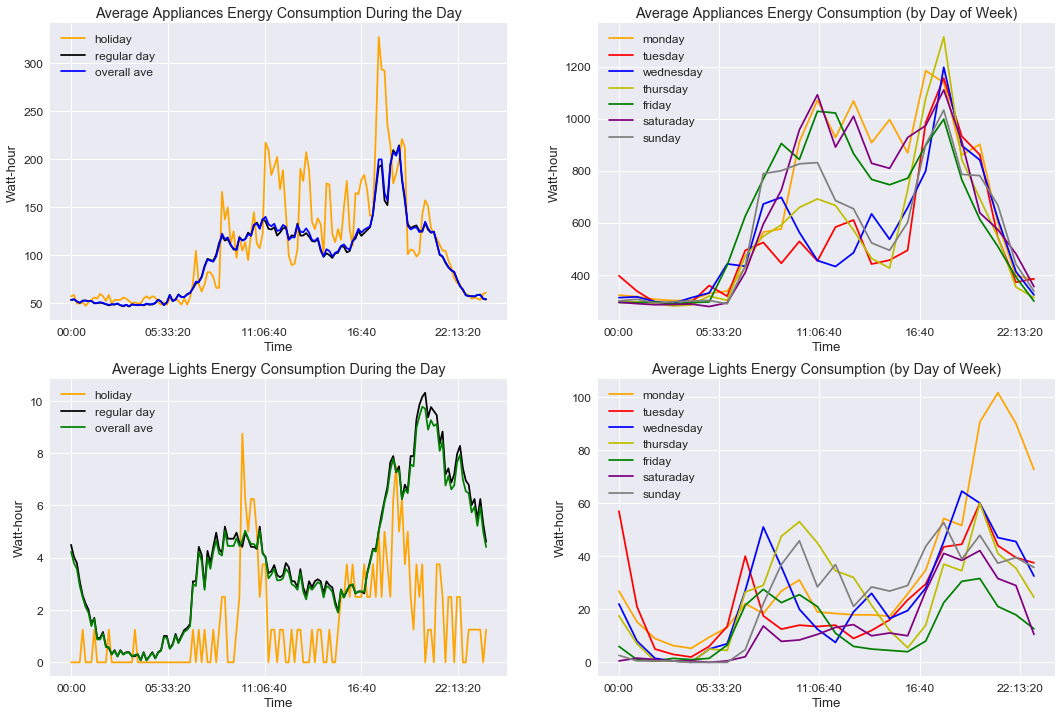

In [250]:
sns.set_style("darkgrid")
fig1 = plt.figure(figsize = (18, 12))

ax = fig1.add_subplot(2,2,1)
by_time0 = df_energy.groupby(df_energy.index.time).mean()
by_time1 = df_energy.groupby(['holiday_flag',df_energy.index.time]).mean()

#by_time['Appliances'].plot(color='b')
ax.plot(by_time1['Appliances'][True], color='orange', label= 'holiday')
ax.plot(by_time1['Appliances'][False],color='black', label= 'regular day')
ax.plot(by_time0['Appliances'],color='blue', label= 'overall ave')
plt.xlabel('Time')
plt.ylabel('Watt-hour')
plt.title("Average Appliances Energy Consumption During the Day")
ax.legend(loc=2)
#plt.xticks(rotation='vertical')

ax = fig1.add_subplot(2,2,2)

df_energy_hourly = df_energy.resample('H').sum()
day = df_energy_hourly.index.weekday
by_time = df_energy_hourly.groupby([day, df_energy_hourly.index.time]).mean()

ax.plot(by_time['Appliances'].loc[0],label="monday", color='orange')
ax.plot(by_time['Appliances'].loc[1],label="tuesday", color='r')
ax.plot(by_time['Appliances'].loc[2],label="wednesday", color='b')
ax.plot(by_time['Appliances'].loc[3],label="thursday", color='y')
ax.plot(by_time['Appliances'].loc[4],label="friday", color='g')
ax.plot(by_time['Appliances'].loc[5],label="saturaday", color='purple')
ax.plot(by_time['Appliances'].loc[6],label="sunday", color='grey')
    
ax.legend(loc=2)

plt.xlabel('Time')
plt.ylabel('Watt-hour')
plt.title("Average Appliances Energy Consumption (by Day of Week)")

ax = fig1.add_subplot(2,2,3)
#by_time['lights'].plot(color='g')
ax.plot(by_time1['lights'][True], color='orange', label= 'holiday')
ax.plot(by_time1['lights'][False],color='black', label= 'regular day')
ax.plot(by_time0['lights'],color='g', label= 'overall ave')
plt.xlabel('Time')
plt.ylabel('Watt-hour')
plt.title("Average Lights Energy Consumption During the Day")
#plt.xticks(rotation='vertical')
ax.legend(loc=2)

ax = fig1.add_subplot(2,2,4)
ax.plot(by_time['lights'].loc[0],label="monday", color='orange')
ax.plot(by_time['lights'].loc[1],label="tuesday", color='r')
ax.plot(by_time['lights'].loc[2],label="wednesday", color='b')
ax.plot(by_time['lights'].loc[3],label="thursday", color='y')
ax.plot(by_time['lights'].loc[4],label="friday", color='g')
ax.plot(by_time['lights'].loc[5],label="saturaday", color='purple')
ax.plot(by_time['lights'].loc[6],label="sunday", color='grey')
    
ax.legend(loc=2)

plt.xlabel('Time')
plt.ylabel('Watt-hour')
plt.title("Average Lights Energy Consumption (by Day of Week)")
#plt.xticks(rotation='vertical')
plt.show()

Although the graphs above look messy with the overlaying lines, it demonstrates the difference in energy consumption patterns between different types of days. for instance, the light usage is lower on holidays, but the appliance usage is higher and more irregular

## 7. Forcasting Time Series using the Prophet Model

Finally we will use the facebook's prophet model to do a time series forecast for the next 90 days. As the available training data is only of 4.5 months, it will not be possible to model potential seasonal varations. The high variance of the training data also means there will be a large error margin in the forecast.

In [146]:
df1 = df_energy_daily["Appliances"]

In [147]:
from fbprophet import Prophet
# Python
df1 = df_energy_daily["Appliances"]


In [148]:
df1 = df1.reset_index()

In [149]:
df1.dtypes
df1["ds"] = df1["date"]

In [150]:
df1["y"]=df1["Appliances"]

In [132]:
df_holiday = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(holidays),
  'lower_window': 0,
  'upper_window': 1,
})

In [151]:
m = Prophet()
m.fit(df1)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [152]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
222,2016-08-21
223,2016-08-22
224,2016-08-23
225,2016-08-24
226,2016-08-25


In [153]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
222,2016-08-21,2253.664918,1369.485957,3178.585848
223,2016-08-22,2640.883232,1736.259207,3526.986372
224,2016-08-23,2066.191167,1180.768911,2866.151448
225,2016-08-24,2133.524947,1226.635295,2958.513000
226,2016-08-25,2145.632620,1279.654640,3042.640693


In [162]:
fig1 = m.plot(forecast, xlabel="date", ylabel="watts")

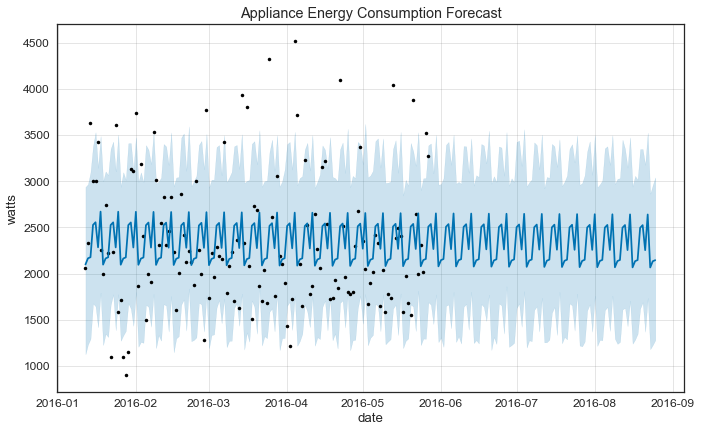

In [163]:
plt.title("Appliance Energy Consumption Forecast")
plt.show()

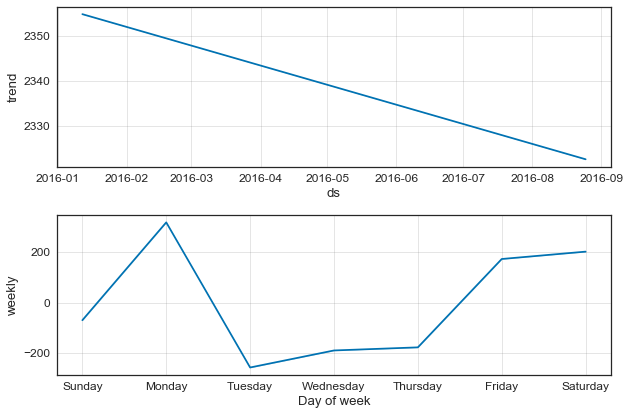

In [172]:
fig2 = m.plot_components(forecast)
plt.show()

In [176]:
df_holiday.shape

(9, 4)

** now forcasting taking the holidays into account **

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


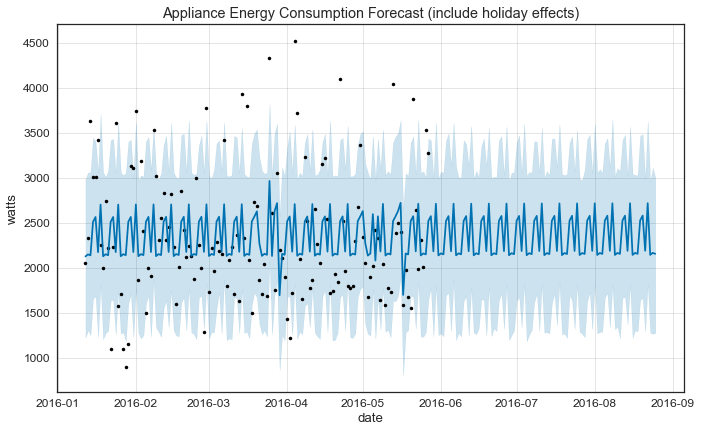

In [178]:
mh = Prophet(holidays = df_holiday)
mh.fit(df1)
future_hol = mh.make_future_dataframe(periods=90)

forecast_hol = mh.predict(future_hol)

fig1h = mh.plot(forecast_hol, xlabel="date", ylabel="watts")
plt.title("Appliance Energy Consumption Forecast (include holiday effects)")
plt.show()

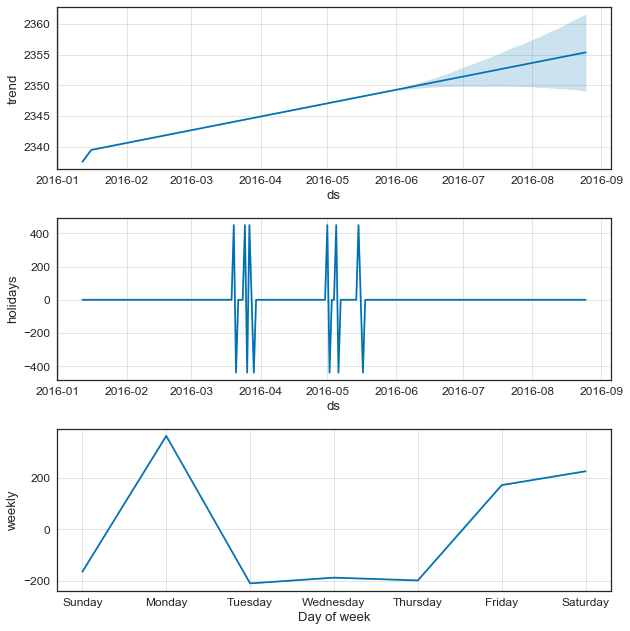

In [179]:
fig2 = mh.plot_components(forecast_hol)
plt.show()

**Observation:** the result look a little strange in that there is an increasing time trend, after the effect of holidays have been taken into account. As the data span is very small, it is very sensitive to any noise and irregularity in the data and we can come up with many potential models to fit the pattern, though none would be very accurate.

** now let's forecast the lights energy consumption **

In [183]:
df3=df_energy_daily

In [184]:
df3 = df3["lights"]
df3.head()

date
2016-01-12    101.666667
2016-01-13    130.000000
2016-01-14    120.000000
2016-01-15    143.333333
2016-01-16    191.666667
Freq: D, Name: lights, dtype: float64

In [186]:
df3 = df3.reset_index()
df3["ds"] = df3["date"]
df3["y"]=df3["lights"]

In [108]:
#df3= df3[:-1]

In [190]:
m = Prophet()
m.fit(df3)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [191]:
future2 = m.make_future_dataframe(periods=90)
future2.tail()

,ds
222,2016-08-21
223,2016-08-22
224,2016-08-23
225,2016-08-24
226,2016-08-25


In [192]:
forecast2 = m.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
222,2016-08-21,-35.390444,-112.732458,43.758637
223,2016-08-22,0.737773,-76.944755,86.230040
224,2016-08-23,-38.835982,-124.597303,38.468426
225,2016-08-24,-34.808224,-111.653965,47.820914
226,2016-08-25,-37.131201,-118.861127,43.616080


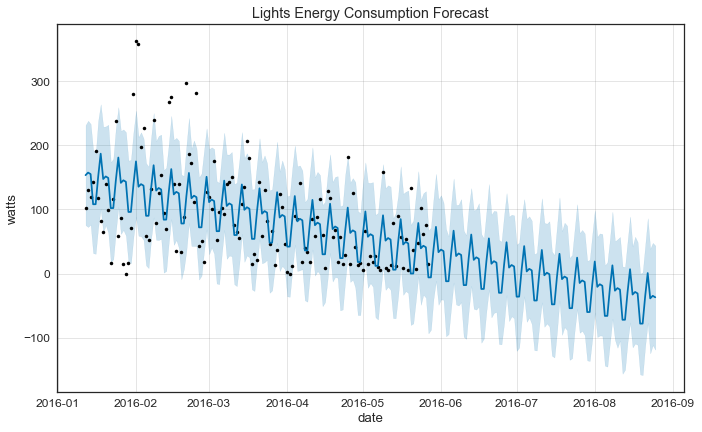

In [193]:
fig2 = m.plot(forecast2, xlabel="date", ylabel="watts")
plt.title("Lights Energy Consumption Forecast")
plt.show()

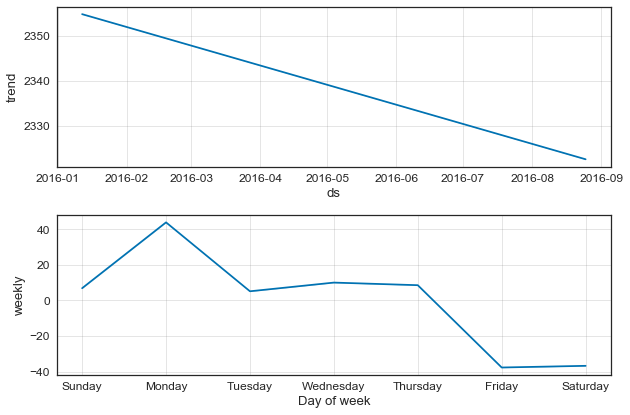

In [194]:
fig2 = m.plot_components(forecast)
plt.show()

** lastly, we will check the daily light energy consumption taking into accuont the effects of the holidays**

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


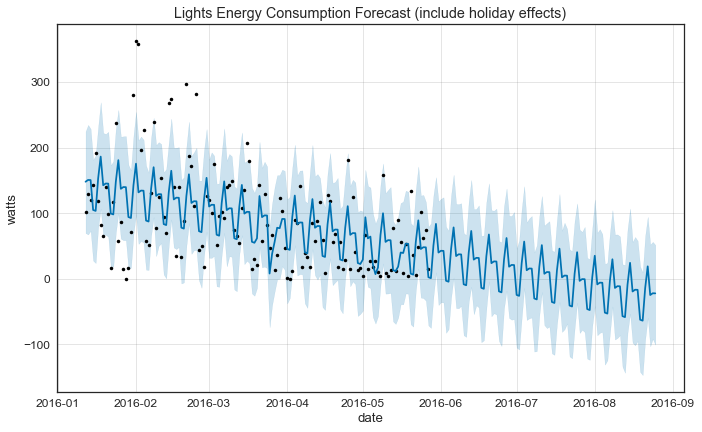

In [197]:
m2h = Prophet(holidays = df_holiday)
m2h.fit(df3)
future_hol2 = m2h.make_future_dataframe(periods=90)

forecast_hol2 = m2h.predict(future_hol2)

fig2h = m2h.plot(forecast_hol2, xlabel="date", ylabel="watts")
plt.title("Lights Energy Consumption Forecast (include holiday effects)")
plt.show()

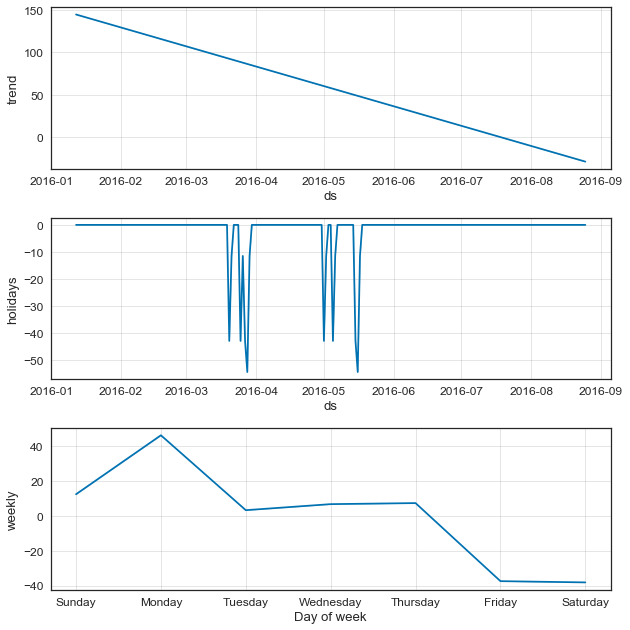

In [200]:
fig3h = m2h.plot_components(forecast_hol2)
plt.show()

The forecast model reflects the trends we have visually detected during the exploratory analysis, including identification of overall trends and weekly consumption patterns. The overall patterns show a large area of uncertainty, as the algorithm attempts to find a repeating pattern that fits the training data.

further ideas 
         - arima model
         - linear regression model with arima errors, using appropriate variables and dummy to model each month
         - log transformations
         - ammend dataset with average daily temperature in the region